Import libraries

In [1]:
from algorithm import *
from visualize import *
from classes.environment import Environment

import h5py
import os

# Used for seed in np.random
Reproduce = 2023

Baseline

In [2]:
k = 6
Qs = [1 + 0.5*i for i in range(7)]
env = Environment()

Save data in a HDF5 file

In [3]:
np.random.seed(Reproduce)
simulate_episodes("TheBaseline", env, Qs, n_episodes=1_000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [2]:
current_dir = os.getcwd()
file_path = os.path.join(current_dir, '..', 'data', 'simulation_data.h5')

In [3]:
# Open the HDF5 file in read mode
file = h5py.File(file_path, 'r')

# Access the dataset within the 'simulation' group
group = file['TheBaseline']

pi1_L = group['pi1_L'][:]  # Read the entire dataset
pi2_L = group['pi2_L'][:]
theta1_L = group['theta1_L'][:]
theta2_L = group['theta2_L'][:]
q1_L = group['q1_L'][:]
q2_L = group['q2_L'][:]
pi1_t = group['pi1_t'][:]
pi2_t = group['pi2_t'][:]
theta1_t = group['theta1_t'][:]
theta2_t = group['theta2_t'][:]
q1_t = group['q1_t'][:]
q2_t = group['q2_t'][:]

# Close the HDF5 file
file.close()

In [24]:

def cycle_classifier(pi1_L, pi2_L, theta1_L, theta2_L, q1_L, q2_L):
    d = dict()
    for i in range(len(q2_L)):
        pattern = []
        for t in range(len(q2_L[i])-1,-1,-1):
            cur_play = (pi1_L[i][t], pi2_L[i][t], theta1_L[i][t], theta2_L[i][t], q1_L[i][t], q2_L[i][t])
            if len(pattern) > 0 and (pattern[0] == cur_play):
                break
            pattern.append(cur_play)
        pattern = pattern[::-1]
        rrr = comp_pattern(pattern)
        pattern_found = False
        for i in range(len(pattern)):
            a = pattern[i:] + pattern[:i]
            b = rrr[i:] + rrr[:i]
            if tuple(a) in d:
                d[tuple(a)] += 1
                pattern_found = True
                break
            if tuple(b) in d:
                d[tuple(b)] += 1
                pattern_found = True
                break
        if not pattern_found:
            d[tuple(pattern)] = 1
    return d

def comp_pattern(pattern):
    ff = []
    for a,b,c,d,e,f in pattern:
        ff.append((b,a,d,c,f,e))
    return ff

In [25]:
d = cycle_classifier(pi1_L, pi2_L, theta1_L, theta2_L, q1_L, q2_L)

In [27]:
len(d) # Number of different patterns found out of 1000

508

In [62]:
key_with_highest_value = max(d, key=d.get)
key_with_highest_value # Close to competitive in most frequent case

((4.333333333333333, 2.8055555555555554, 0.0, 0.16666666666666666, 2.0, 1.5),)

In [63]:
d[key_with_highest_value]

20

In [40]:
len_longest_cylcle = 0
longest_cycle = ()
for k in d.keys():
    if len(k) > len_longest_cylcle:
        len_longest_cylcle = len(k)
        longest_cycle = k
len_longest_cylcle

12

In [41]:
longest_cycle

((4.722222222222221,
  2.3055555555555554,
  0.16666666666666666,
  0.3333333333333333,
  2.5,
  1.5),
 (5.138888888888889, 1.6666666666666665, 0.16666666666666666, 0.0, 2.5, 1.0),
 (4.888888888888888, 2.3333333333333335, 0.3333333333333333, 0.0, 2.0, 1.0),
 (2.5555555555555554,
  3.3055555555555554,
  0.3333333333333333,
  0.3333333333333333,
  2.0,
  2.5),
 (1.8333333333333335, 4.972222222222221, 0.0, 0.3333333333333333, 1.0, 2.5),
 (3.5, 3.25, 0.0, 0.5, 1.0, 1.0),
 (5.0, 2.75, 1.0, 0.5, 2.5, 1.0),
 (3.333333333333334, 3.3055555555555554, 1.0, 0.8333333333333334, 2.5, 2.0),
 (4.0, 4.305555555555555, 0.5, 0.8333333333333334, 1.5, 2.0),
 (2.75, 4.75, 0.5, 0.5, 1.5, 2.5),
 (2.9722222222222223, 2.666666666666666, 0.16666666666666666, 0.5, 2.0, 2.5),
 (4.638888888888888,
  3.0555555555555554,
  0.16666666666666666,
  0.3333333333333333,
  2.0,
  1.5))

In [42]:
d[longest_cycle]

1

In [43]:
som = 0
for i in longest_cycle:
    som += i[0] + i[1]
som / 24

3.5

In [47]:
highest_profitable_cycle = ()
profit = 0
for k in d.keys():
    som = 0
    for i in k:
        som += i[0] + i[1]
    p = som / (2*len(k))
    if p > profit:
        profit = p
        highest_profitable_cycle = k
profit # Exactly profit without profitsharing

4.5

In [48]:
highest_profitable_cycle # As computed

((4.5, 4.5, 1.0, 1.0, 1.5, 1.5),)

In [49]:
d[highest_profitable_cycle] # Only found once or is it?

1

In [51]:
res = 0
for k in d.keys():
    som = 0
    for i in k:
        som += i[0] + i[1]
    p = som / (2*len(k))
    if p >= 4.5:
        res += 1
res # It is, algorithm most likely correct

1

In [54]:
lowest_profitable_cycle = ()
profit = float("inf")
for k in d.keys():
    som = 0
    for i in k:
        som += i[0] + i[1]
    p = som / (2*len(k))
    if p < profit:
        profit = p
        lowest_profitable_cycle = k
profit # Even below Competitive

2.8432539682539684

In [55]:
lowest_profitable_cycle

((3.5, 4.25, 0.5, 0.0, 1.5, 1.5),
 (1.0555555555555556, 1.5, 0.6666666666666666, 0.0, 3.5, 1.5),
 (3.388888888888889,
  1.3055555555555554,
  0.6666666666666666,
  0.16666666666666666,
  3.5,
  1.0),
 (5.055555555555555,
  1.4722222222222219,
  0.3333333333333333,
  0.16666666666666666,
  3.0,
  1.0),
 (3.0555555555555554, 0.0, 0.3333333333333333, 1.0, 3.0, 2.5),
 (3.5, 3.75, 0.5, 1.0, 1.5, 2.5),
 (3.0, 4.972222222222222, 0.5, 0.16666666666666666, 1.5, 2.0))

In [56]:
som1 = 0
som2 = 0
for i in lowest_profitable_cycle:
    som1 += i[0]
    som2 += i[1]
print(som1/len(lowest_profitable_cycle), som2/len(lowest_profitable_cycle))

3.2222222222222223 2.4642857142857144


In [58]:
# How many times below competitive
res = 0
for k in d.keys():
    som = 0
    for i in k:
        som += i[0] + i[1]
    p = som / (2*len(k))
    if p <= 3:
        res += 1
res # Okay, supra-competitive profits in 99.7% of the runs

3

In [61]:
# Highest individual profits
highest_profitable_cycle = ()
profit = 0
for k in d.keys():
    som1 = som2 = 0
    for i in k:
        som1 += i[0]
        som2 += i[1]
    p = max(som1 / len(k), som2 / len(k))
    if p > profit:
        profit = p
        highest_profitable_cycle = k
print(profit) # Individual profits can exceed equal profit sharing profits
print(d[highest_profitable_cycle])
highest_profitable_cycle

6.305555555555555
1


((2.388888888888889,
  6.305555555555555,
  0.6666666666666666,
  0.16666666666666666,
  1.0,
  2.0),)

In [65]:
av_profit = 0
for k in d.keys():
    som = 0
    for i in k:
        som += i[0] + i[1]
    p = som / (2*len(k))
    av_profit += p*d[k]
av_profit / 1000 # 0.5 when non profit sharing in metric, lower than 0.64 found by others, probably because i use a more fair competitive benchmark

3.8053096891534444

In [66]:
av_profit = 0
for k in d.keys():
    som = 0
    for i in k:
        som += i[2] + i[3]
    p = som / (2*len(k))
    av_profit += p*d[k]
av_profit / 1000

0.39604801587301625

In [67]:
av_profit = 0
for k in d.keys():
    som = 0
    for i in k:
        som += i[4] + i[5]
    p = som / (2*len(k))
    av_profit += p*d[k]
av_profit / 1000

1.7836113095238095

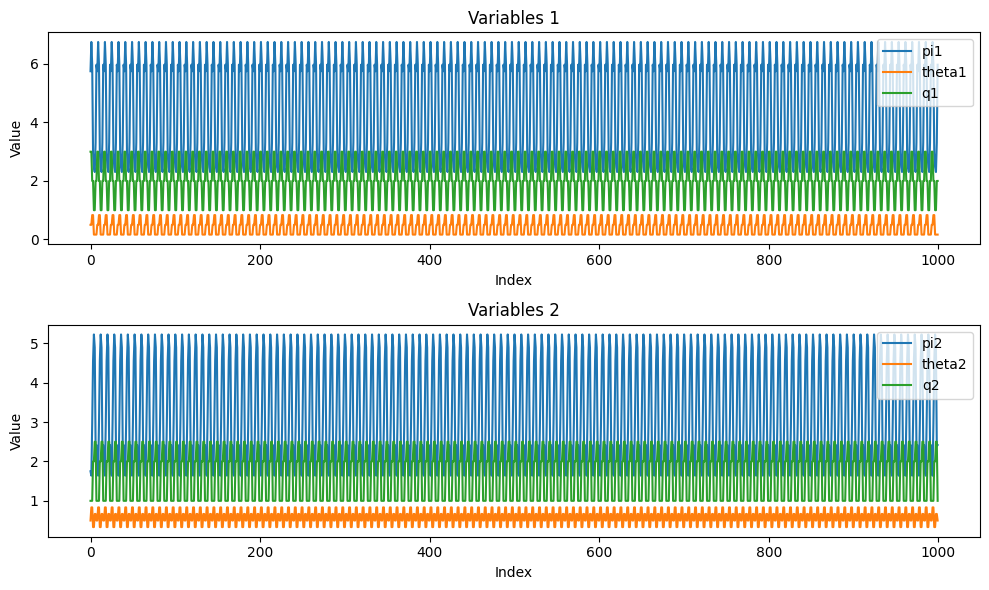

In [14]:
visualize_last_L(pi1_L[824], pi2_L[824], theta1_L[824], theta2_L[824], q1_L[824], q2_L[824])

In [15]:
file = h5py.File(file_path, 'r')

# Get the keys (group names) in the file
group_names = list(file.keys())

# Print the group names
for group_name in group_names:
    print(group_name)

# Close the file
file.close()

Baseline
BaselineFinalTest
BaselineFinalTest1
TEST007
TEST2234
TEST223664
TheBaseline


In [15]:
len(group_names)

1

In [20]:
res

27775380

In [18]:
choices = [1,2,3,4,5,6]
import random
res = 0
for i in range(100_000_000):
    random_selection = random.choices(choices, k=4)
    if ( (1 in random_selection and 2 in random_selection and 3 in random_selection) or
         (4 in random_selection and 2 in random_selection and 3 in random_selection) or
         (5 in random_selection and 4 in random_selection and 3 in random_selection) or
         (4 in random_selection and 5 in random_selection and 6 in random_selection)):
        res += 1
res / 100_000_000

0.2777538